In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime

In [2]:
stock_number = ['DJIA','^GSPC']
start = datetime.datetime(2000,1,1)
end   = datetime.datetime(2020,7,1)
df_stock = pdr.DataReader(stock_number, 'yahoo', start, end)

In [3]:
df_stock.Close[['DJIA']].tail()

Symbols,DJIA
Date,
2020-06-25,25745.599609
2020-06-26,25015.550781
2020-06-29,25595.800781
2020-06-30,25812.880859
2020-07-01,25734.970703


In [4]:
print(df_stock.Close.rolling(5).mean())

Symbols             DJIA        ^GSPC
Date                                 
1999-12-31           NaN          NaN
2000-01-03           NaN          NaN
2000-01-04           NaN          NaN
2000-01-05           NaN          NaN
2000-01-06  11245.693945  1425.889990
...                  ...          ...
2020-06-25  25848.812109  3096.196045
2020-06-26  25677.630078  3078.458057
2020-06-29  25591.798047  3065.534033
2020-06-30  25523.154297  3059.334033
2020-07-01  25580.960547  3072.440039

[5158 rows x 2 columns]


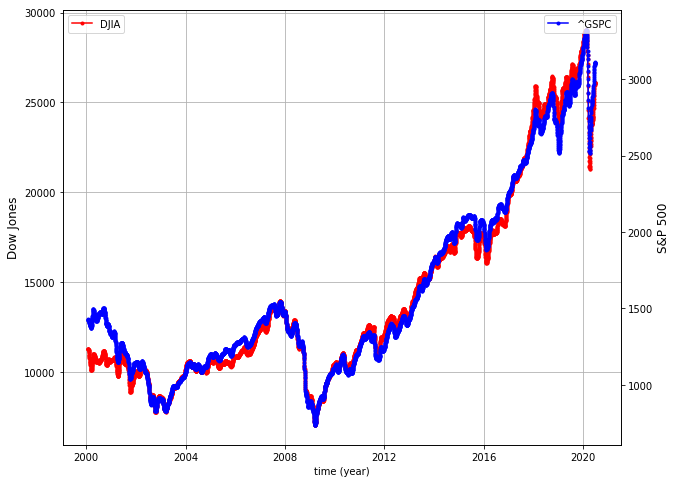

In [5]:
fig, ax1 = plt.subplots(figsize=(10,8))
ax1.plot(df_stock.Close.DJIA.rolling(20).mean(),'.-r')
ax1.set_xlabel('time (year)')
ax1.set_ylabel('Dow Jones',fontsize=12)
ax1.legend(loc=0)
ax2 = ax1.twinx()
ax2.plot(df_stock.Close['^GSPC'].rolling(20).mean(),'.-b')
ax2.set_ylabel('S&P 500',fontsize=12)
ax2.legend(loc=1)
ax1.grid()
#fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [6]:
df_stock.Close['^GSPC'].corr(df_stock.Close.DJIA)

0.9920316252356848

## 美匯指數

In [7]:
USD_number = ['DX-Y.NYB']
start = datetime.datetime(2000,1,1)
end   = datetime.datetime(2020,7,1)
df_USD = pdr.DataReader(USD_number, 'yahoo', start, end)

In [8]:
df_USD.Close.head()

Symbols,DX-Y.NYB
Date,
1999-12-31,101.870003
2000-01-03,100.220001
2000-01-04,100.410004
2000-01-05,100.379997
2000-01-06,100.650002


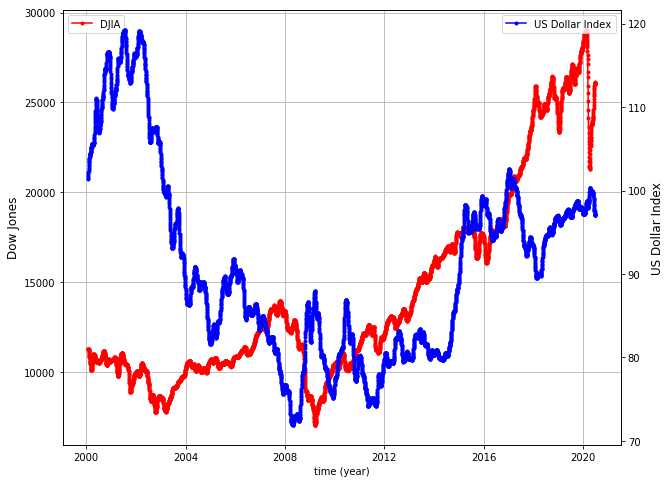

In [9]:
fig, ax1 = plt.subplots(figsize=(10,8))
ax1.plot(df_stock.Close.DJIA.rolling(20).mean(),'.-r')
ax1.set_xlabel('time (year)')
ax1.set_ylabel('Dow Jones',fontsize=12)
ax1.legend(loc=0)
ax2 = ax1.twinx()
ax2.plot(df_USD.Close.rolling(20).mean(),'.-b')
ax2.set_ylabel('US Dollar Index',fontsize=12)
ax2.legend(['US Dollar Index'],loc=1)
ax1.grid()
#fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [10]:
DJvsUSD = pd.concat([df_stock.Close.DJIA, df_USD.Close], axis=1, sort=False).dropna()

In [11]:
DJvsUSD.head()

,DJIA,DX-Y.NYB
Date,,
1999-12-31,11497.120117,101.870003
2000-01-03,11357.509766,100.220001
2000-01-04,10997.929688,100.410004
2000-01-05,11122.650391,100.379997
2000-01-06,11253.259766,100.650002


In [12]:
DJvsUSD.DJIA.corr(DJvsUSD['DX-Y.NYB'])

0.10073891290206133

## 倫敦金

In [13]:
gold = ['GOLDAMGBD228NLBM'] # the Gold Fixing Price 10:30 AM (London time) in London Bullion Market, in US Dollars
start = datetime.datetime(2000,1,1)
end   = datetime.datetime(2020,7,1)
df_gold = pdr.DataReader(gold, 'fred', start, end) # Federal Reserve Economic Data (FRED) portal

In [14]:
df_gold.head()

,GOLDAMGBD228NLBM
DATE,
2000-01-03,NaN
2000-01-04,282.05
2000-01-05,282.10
2000-01-06,280.35
2000-01-07,282.00


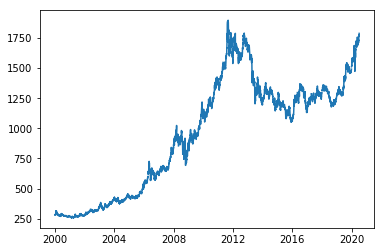

In [15]:
plt.plot(df_gold)

In [16]:
df_gold.rolling(20).mean()

,GOLDAMGBD228NLBM
DATE,
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,NaN
2000-01-06,NaN
2000-01-07,NaN
...,...
2020-06-25,1728.6375
2020-06-26,1730.4600
2020-06-29,1732.1600


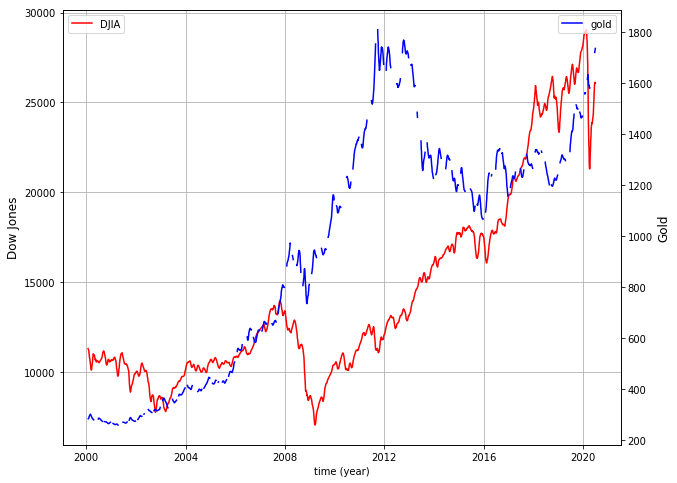

In [17]:
fig, ax1 = plt.subplots(figsize=(10,8))
curve1 = ax1.plot(df_stock.Close.DJIA.rolling(20).mean(),'-r')
ax1.set_xlabel('time (year)')
ax1.set_ylabel('Dow Jones',fontsize=12)
ax1.legend()
ax2 = ax1.twinx()
curve2 = ax2.plot(df_gold.rolling(20).mean(),'-b')
ax2.set_ylabel('Gold',fontsize=12)
ax2.legend(['gold'],loc=1)
ax1.grid()

In [18]:
DJvsGOLD = pd.concat([df_stock.Close.DJIA, df_gold], axis=1, sort=False).dropna()

In [19]:
DJvsGOLD.head()

,DJIA,GOLDAMGBD228NLBM
2000-01-04,10997.929688,282.05
2000-01-05,11122.650391,282.10
2000-01-06,11253.259766,280.35
2000-01-07,11522.559570,282.00
2000-01-10,11572.200195,281.70


In [20]:
DJvsGOLD.GOLDAMGBD228NLBM.corr(DJvsGOLD.DJIA)

0.5993094428279137

In [21]:
#Tbond = ['DGS1MO'] #
Tbond = ['DGS10']
start = datetime.datetime(2000,1,1)
end   = datetime.datetime(2020,7,1)
df_Tbond = pdr.DataReader(Tbond, 'fred', start, end) # Federal Reserve Economic Data (FRED) portal

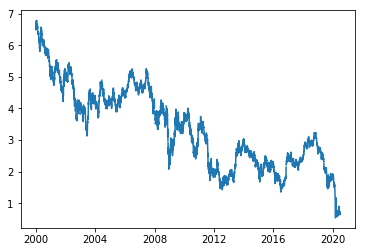

In [22]:
plt.plot(df_Tbond)

In [23]:
df_Tbond.head()

,DGS10
DATE,
2000-01-03,6.58
2000-01-04,6.49
2000-01-05,6.62
2000-01-06,6.57
2000-01-07,6.52


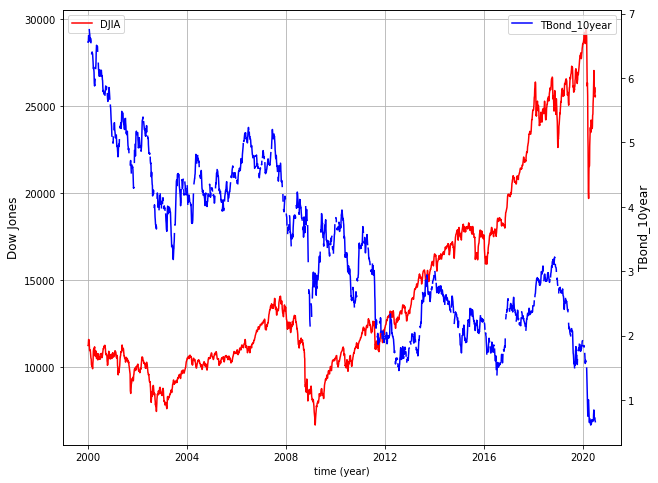

In [24]:
fig, ax1 = plt.subplots(figsize=(10,8))
ax1.plot(df_stock.Close.DJIA.rolling(5).mean(),'-r')
ax1.set_xlabel('time (year)')
ax1.set_ylabel('Dow Jones',fontsize=12)
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(df_Tbond.rolling(5).mean(),'-b')
ax2.set_ylabel('TBond_10year',fontsize=12)
ax2.legend(['TBond_10year'],loc=1)
ax1.grid()

In [25]:
DJvsTBOND = pd.concat([df_stock.Close.DJIA, df_Tbond], axis=1, sort=False).dropna()

In [26]:
DJvsTBOND.head()

,DJIA,DGS10
2000-01-03,11357.509766,6.58
2000-01-04,10997.929688,6.49
2000-01-05,11122.650391,6.62
2000-01-06,11253.259766,6.57
2000-01-07,11522.559570,6.52


In [27]:
DJvsTBOND.DJIA.corr(DJvsTBOND.DGS10)

-0.6016925963986159

## [聯準會資產負債表](https://www.quandl.com/data/FRED/WALCL-All-Federal-Reserve-Banks-Total-Assets)

In [28]:
FED_asset = ['WALCL']
start = datetime.datetime(2000,1,1)
end   = datetime.datetime(2020,7,1)
df_FED_asset = pdr.DataReader(FED_asset, 'fred', start, end) # Federal Reserve Economic Data (FRED) portal

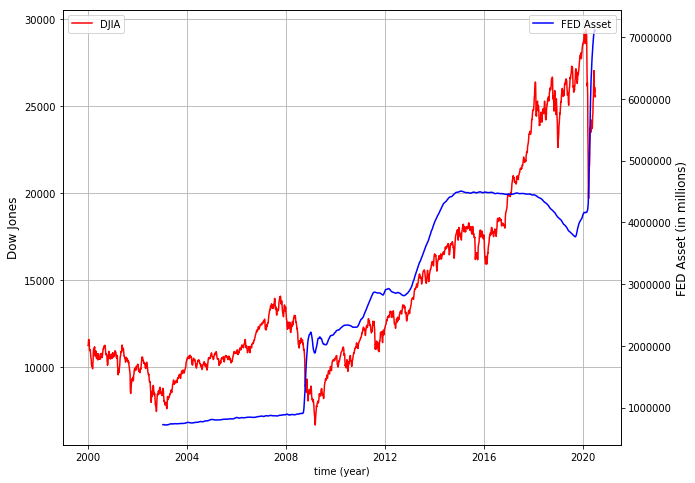

In [29]:
fig, ax1 = plt.subplots(figsize=(10,8))
curve1 = ax1.plot(df_stock.Close.DJIA.rolling(5).mean(),'-r')
ax1.set_xlabel('time (year)')
ax1.set_ylabel('Dow Jones',fontsize=12)
ax1.legend()
ax2 = ax1.twinx()
curve2 = ax2.plot(df_FED_asset.rolling(5).mean(),'-b')
ax2.set_ylabel('FED Asset (in millions)',fontsize=12)
ax2.legend(['FED Asset'],loc=1)
ax1.grid()

In [30]:
DJvsFED = pd.concat([df_stock.Close.DJIA, df_FED_asset], axis=1, sort=False).dropna()

In [31]:
DJvsTBOND.DJIA.corr(DJvsFED.WALCL)

0.777794449247773

In [32]:
pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?id=WALCL')

,DATE,WALCL
0,2002-12-18,719542.0
1,2002-12-25,732059.0
2,2003-01-01,730994.0
3,2003-01-08,723762.0
4,2003-01-15,720074.0
...,...,...
912,2020-06-10,7168936.0
913,2020-06-17,7094690.0
914,2020-06-24,7082302.0
915,2020-07-01,7009040.0


In [33]:
Price = pd.concat([df_stock.Close.DJIA, df_stock.Close['^GSPC'], df_USD.Close, df_gold, df_Tbond, df_FED_asset], axis=1, sort=False).dropna()

In [34]:
Price.head()

,DJIA,^GSPC,DX-Y.NYB,GOLDAMGBD228NLBM,DGS10,WALCL
2002-12-18,8447.349609,891.119995,103.629997,337.05,4.06,719542.0
2003-01-08,8595.309570,909.929993,101.870003,346.75,4.00,723762.0
2003-01-15,8723.179688,918.219971,101.339996,351.90,4.10,720074.0
2003-01-22,8318.730469,878.359985,100.230003,359.25,3.95,735953.0
2003-01-29,8110.709961,864.359985,99.279999,369.85,4.06,712809.0


In [38]:
Price.columns=['Dow Jones','S&P 500', 'US Dollar Index','Gold', 'Treasury Bond Yield-10-Year', 'Fed Total Asset']

In [ ]:
import seaborn as sns

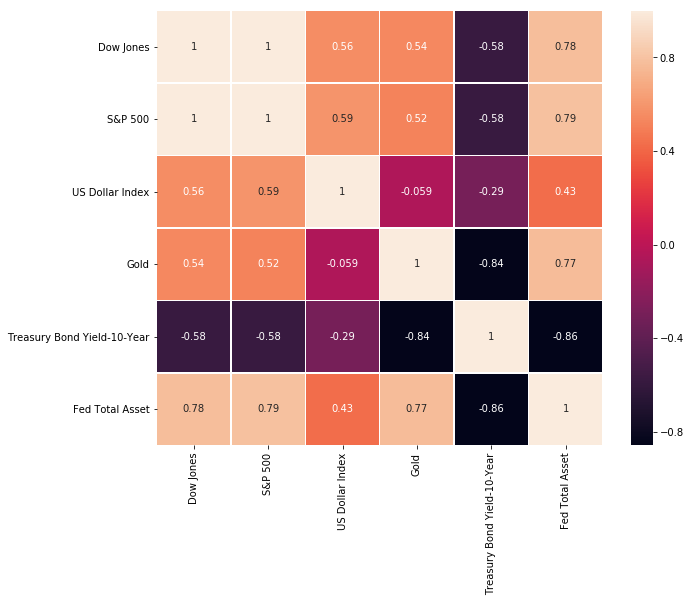

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(Price.corr(),annot=True, linewidths=.5)